## Load required libraries

In [110]:
import pandas as pd
import numpy as np
import PyPDF2
import textract
import re
import os
os.chdir('..')

## Read PDF Document and create a text variable

In [111]:
filename = r"C:\Users\Looremeta\Documents\Practicum\PDFs\b9ec731e0cd611e88a41aaed8adac75f.pdf"

pdfFileObj = open(filename,'rb')               #open allows you to read the file
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)   #The pdfReader variable is a readable object that will be parsed
num_pages = pdfReader.numPages                 #discerning the number of pages will allow us to parse through all the pages


count = 0
text = ""
                                                            
while count < num_pages:                       #The while loop will read each page
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
    
#Below if statement exists to check if the above library returned #words. It's done because PyPDF2 cannot read scanned files.

if text != "":
    text = text
    
#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text

else:
    text = textract.process('http://bit.ly/epo_keyword_extraction_document', method='tesseract', language='eng')

    # Now we have a text variable which contains all the text derived from our PDF file.

## Pre-process text
Pre-process the text to convert everything to lowercase, remove tags and remove any special characters. 

In [112]:
def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("</?.*?>"," <> ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text
text = pre_process(text)

Create custom stopword list to include some other common words that we want ignored on top of the nltk English stopword list

In [113]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'however', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come',
                   'take', 'use', 'would', 'can']
stopwords_other = ['percent', 'mr', 'mw', 'image', 'kw', 'de', 'en', 'caption', 'also', 'na', 'something', 'country',
                   'naira','www', 'http', 'mu', 'table', 'fig', 'lin', 'st', 'dev', 'hnlss', 'com', 'page', 'et',
                   'al', 'yes', 'pdf', 'doi', 'no', 'org','example', 'figure', 'appendix']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other

## Keyword Extraction
Use wordcloud library to perform keyword extraction. The library performs the required steps for the user; extracting words and giving them some weighting. It uses scikit-learn's CountVectorizer for that as it is convenient and fast, giving accurate results quickly with reduced chances of complication.

Produce a list of keywords with their frequency rate

In [114]:
from wordcloud import WordCloud
# Create a WordCloud object
wordcloud = WordCloud(max_words=15, stopwords=my_stopwords)

# Generate a word cloud
wordcloud.generate(text)

# Extract keyword tokens with associated frequency
k_words = wordcloud.words_

# now print the results
print("\n===Keywords===")
for k in k_words:
    print(k,k_words[k])


===Keywords===
renewable energy 1.0
public instrument 0.46371681415929206
derisking instrument 0.45663716814159294
wind energy 0.4247787610619469
nancing cost 0.3345132743362832
investment 0.3256637168141593
energy investment 0.3008849557522124
modelling exercise 0.2672566371681416
post derisking 0.24778761061946902
policy derisking 0.2176991150442478
investor 0.18053097345132743
south africa 0.16106194690265488
result 0.15398230088495576
case study 0.15398230088495576
developing countries 0.14513274336283186


Produce a visualization of the keywords by frequency in a wordcloud.

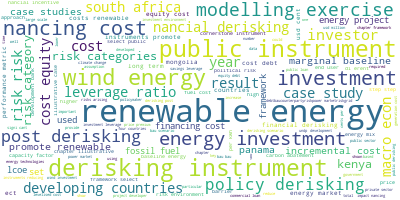

In [115]:
# Import the wordcloud library
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3,
                      stopwords=my_stopwords, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(text)

# Visualize the word cloud
wordcloud.to_image()